<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

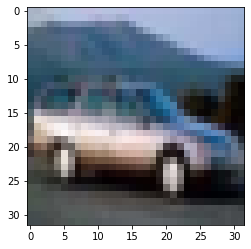

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [4]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
train_images = train_images
train_labels = train_labels

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = train_images[25000:]
train_images = train_images[:25000]

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = train_labels[25000:]
train_labels = train_labels[:25000]
test_labels = to_categorical(test_labels)

In [6]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.0095, decay=1e-6, momentum=0.9, nesterov=True)

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='selu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='selu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 128)        

In [8]:
model_hist = model.fit(train_images, train_labels,
          epochs=25, 
          batch_size=256,
          validation_data=(validation_images, validation_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 22s 885us/step - loss: 2.1955 - accuracy: 0.1823 - val_loss: 2.0459 - val_accuracy: 0.2393
Epoch 2/25
25000/25000 [==============================] - 22s 877us/step - loss: 1.8551 - accuracy: 0.3249 - val_loss: 1.6552 - val_accuracy: 0.3993
Epoch 3/25
25000/25000 [==============================] - 22s 879us/step - loss: 1.6080 - accuracy: 0.4162 - val_loss: 1.5470 - val_accuracy: 0.4343
Epoch 4/25
25000/25000 [==============================] - 22s 883us/step - loss: 1.4850 - accuracy: 0.4631 - val_loss: 1.4251 - val_accuracy: 0.4720
Epoch 5/25
25000/25000 [==============================] - 22s 881us/step - loss: 1.3588 - accuracy: 0.5098 - val_loss: 1.2851 - val_accuracy: 0.5357
Epoch 6/25
25000/25000 [==============================] - 22s 877us/step - loss: 1.2765 - accuracy: 0.5406 - val_loss: 1.2606 - val_accuracy: 0.5472
Epoch 7/25
25000/25000 [==============================] 

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)


10000/10000 [==============================] - 3s 282us/step
test_acc: 0.7087000012397766
test_loss: 0.8780906546592713


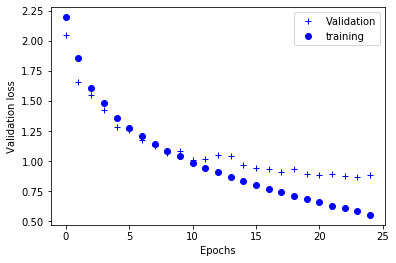

In [10]:
import matplotlib.pyplot as plt

epochs = range(0, 25)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

10000/10000 [==============================] - 3s 291us/step
test_acc: 0.7087000012397766


0.8780906546592713

In [12]:
model.save_weights('./cifar10.h5', overwrite=True)